In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path2models = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models"
path2root = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/data/root"

# From skeleton images

In [3]:
preproc = "skeleton"
nb_epochs = 100
epoch_f = nb_epochs - 1
chkpt_dir = os.path.join(path2models, preproc, "20240920_dlmodel-skeleton")

In [4]:
df_train = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch_f}_train.csv")) for fold in range(10)], axis=0)

In [5]:
df_train.head()

,fold,epoch,set,loss,timestep
0,0,0,train,66.629161,1.726815e+09
1,0,1,train,59.792545,1.726815e+09
2,0,2,train,53.927590,1.726815e+09
3,0,3,train,46.044313,1.726815e+09
4,0,4,train,38.025355,1.726815e+09


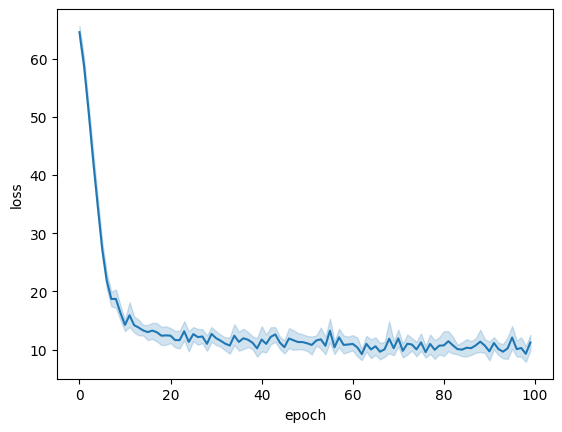

In [6]:
sns.lineplot(data=df_train, x="epoch", y="loss")
plt.show()

In [7]:
df_test = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)

In [8]:
df_test.head()

,fold,epoch,set,loss,r2,mean_absolute_error,root_mean_squarred_error,timestep
0,0,99,test,5.377717,-0.769647,5.377717,6.126517,1.727082e+09
0,1,99,test,6.860005,-0.306121,6.860005,7.668431,1.727082e+09
0,2,99,test,9.053913,-0.033121,9.053913,12.121583,1.727082e+09
0,3,99,test,5.689374,-0.334715,5.689374,6.989558,1.727082e+09
0,4,99,test,4.588212,-0.600952,4.588212,5.908024,1.727082e+09


In [9]:
df_test[["r2", "mean_absolute_error", "root_mean_squarred_error"]].mean()

r2                         -0.509519
mean_absolute_error         6.391010
root_mean_squarred_error    7.644212
dtype: float64

In [10]:
df_test[["r2", "mean_absolute_error", "root_mean_squarred_error"]].std()

r2                          0.882407
mean_absolute_error         1.498712
root_mean_squarred_error    1.960955
dtype: float64

In [84]:
df_test_ep = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch}_test.csv")) for fold in range(10) for epoch in range(0, nb_epochs, 50)], axis=0)

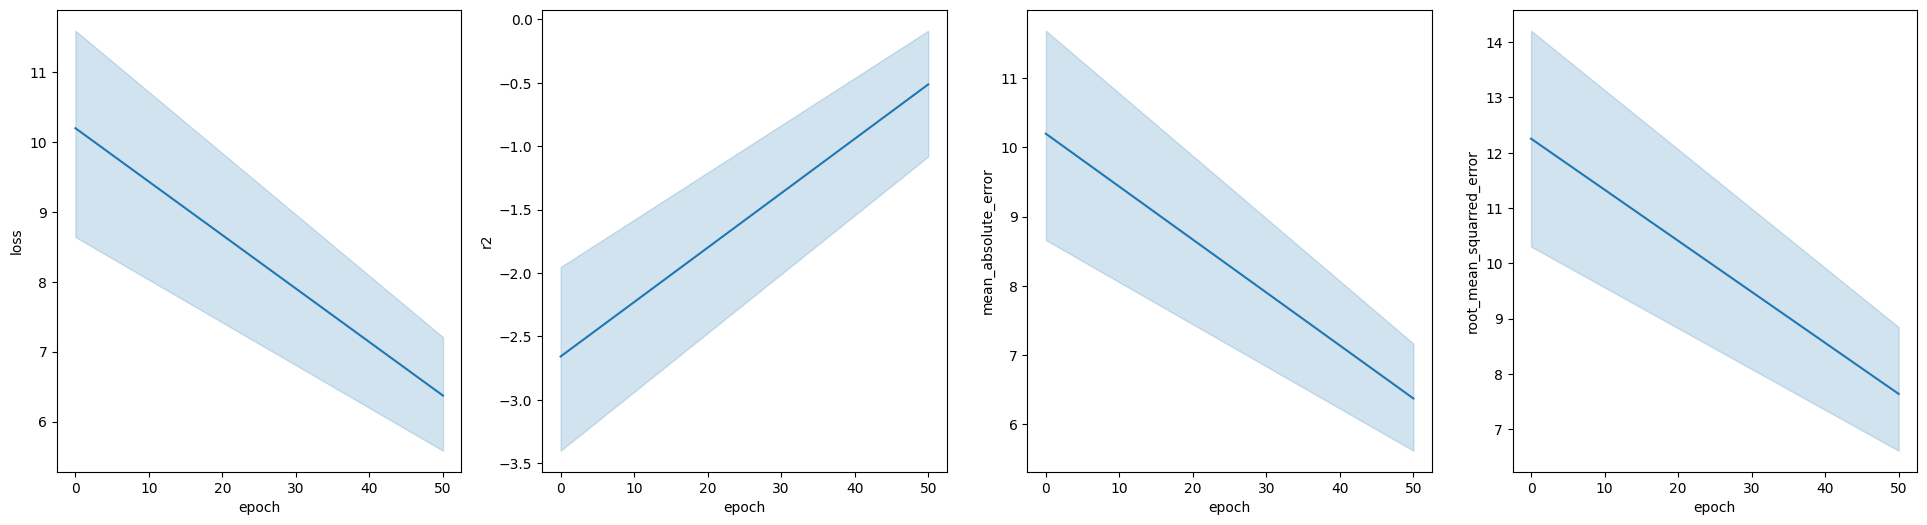

In [85]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
for i, cat in enumerate(["loss", "r2", "mean_absolute_error", "root_mean_squarred_error"]):
    sns.lineplot(data=df_test_ep, x="epoch", y=cat, ax=ax[i])
plt.show()

# From VBM images

In [13]:
preproc = "vbm"
nb_epochs = 100
epoch_f = nb_epochs - 1
chkpt_dir = os.path.join(path2models, preproc, "20240920_dlmodel-vbm")

In [14]:
df_train = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch_f}_train.csv")) for fold in range(10)], axis=0)

In [15]:
df_train.head()

,fold,epoch,set,loss,timestep
0,0,0,train,65.683554,1.726815e+09
1,0,1,train,60.686173,1.726815e+09
2,0,2,train,52.639401,1.726815e+09
3,0,3,train,43.046970,1.726815e+09
4,0,4,train,38.353440,1.726815e+09


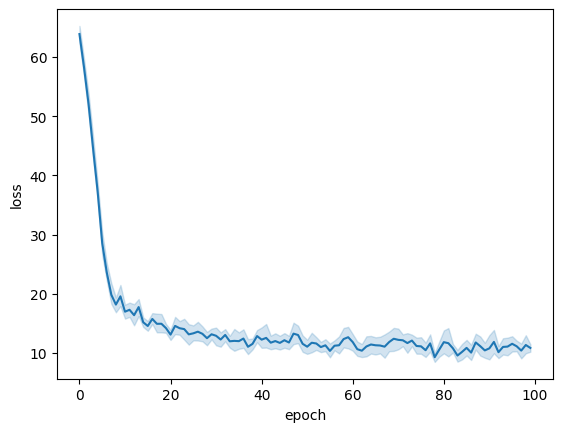

In [16]:
sns.lineplot(data=df_train, x="epoch", y="loss")
plt.show()

In [17]:
df_test = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)

In [18]:
df_test.head()

,fold,epoch,set,loss,r2,mean_absolute_error,root_mean_squarred_error,timestep
0,0,99,test,5.658114,-1.472422,5.658114,7.241551,1.726818e+09
0,1,99,test,6.190820,-0.431021,6.190820,8.026714,1.726821e+09
0,2,99,test,8.953126,0.033731,8.953126,11.722836,1.726824e+09
0,3,99,test,5.382198,-0.119835,5.382198,6.402246,1.726827e+09
0,4,99,test,6.344785,-1.383107,6.344785,7.208169,1.726829e+09


In [19]:
df_test[["r2", "mean_absolute_error", "root_mean_squarred_error"]].mean()

r2                         -0.487381
mean_absolute_error         6.308137
root_mean_squarred_error    7.634874
dtype: float64

In [67]:
df_test_ep = pd.concat([pd.read_csv(os.path.join(chkpt_dir, f"dlmodel_fold-{fold}_epoch-{epoch}_test.csv")) for fold in range(10) for epoch in range(0, nb_epochs, 50)], axis=0)

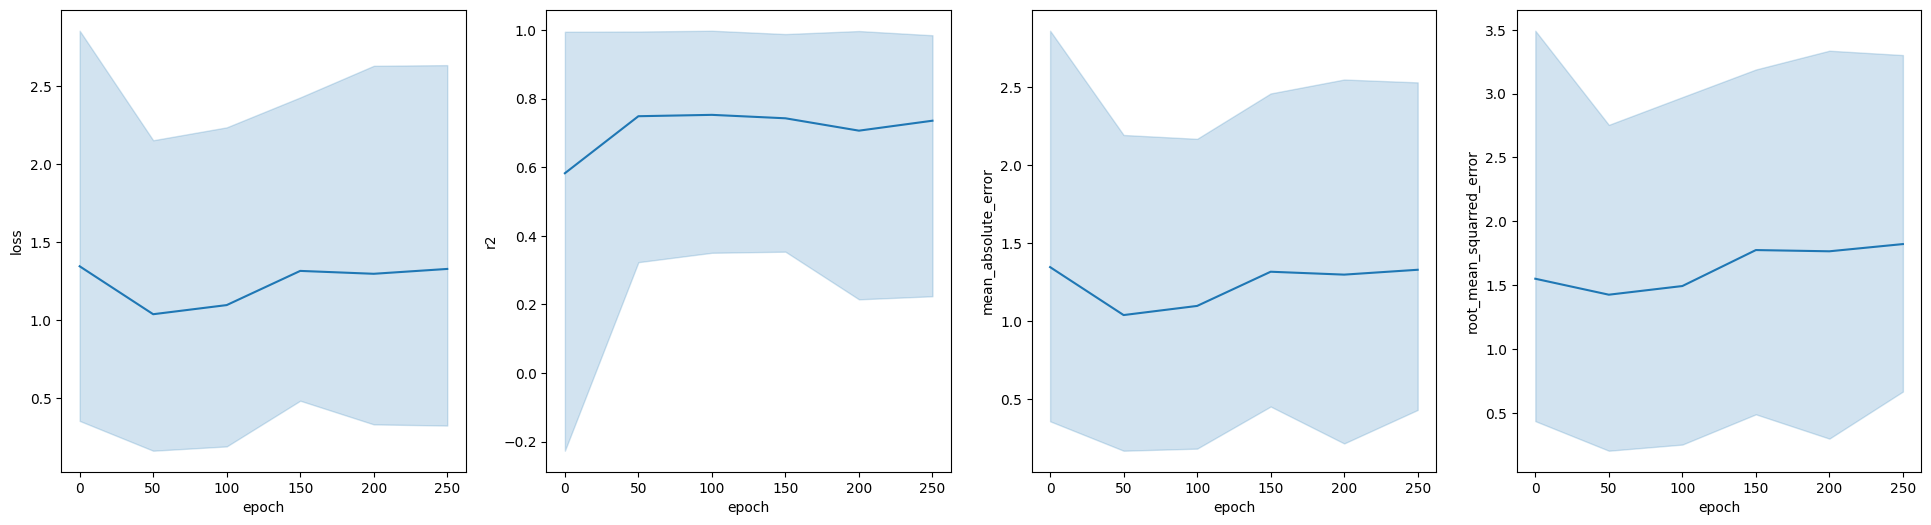

In [68]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
for i, cat in enumerate(["loss", "r2", "mean_absolute_error", "root_mean_squarred_error"]):
    sns.lineplot(data=df_test_ep, x="epoch", y=cat, ax=ax[i])
plt.show()

# Comparison between skeleton and VBM images

In [3]:
epoch_f = 99
df_test_skel = pd.concat([pd.read_csv(os.path.join(path2models, "skeleton", "20240920_dlmodel-skeleton", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)
df_test_vbm = pd.concat([pd.read_csv(os.path.join(path2models, "vbm", "20240920_dlmodel-vbm", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)] , axis=0)
df_test_skel["preproc"] = "skeleton"
df_test_vbm["preproc"] = "vbm"

df_test = pd.concat([df_test_skel, df_test_vbm], axis=0)

In [9]:
df_test[["preproc", "mean_absolute_error", "root_mean_squarred_error"]].groupby("preproc").describe()

mean_absolute_error                                          \
                       count      mean       std       min       25%   
preproc                                                                
skeleton                10.0  6.391010  1.498712  4.393452  5.455631   
vbm                     10.0  6.308137  1.492810  3.410360  5.702288   

                                       root_mean_squarred_error            \
               50%       75%       max                    count      mean   
preproc                                                                     
skeleton  6.161729  7.557903  9.053913                     10.0  7.644212   
vbm       6.205611  7.089208  8.953126                     10.0  7.634874   

                                                                       
               std       min       25%       50%       75%        max  
preproc                                                                
skeleton  1.960955  5.488180  6.299761  7.318767  8.118616  12.121583  
vbm       2.090255  3.759978  6.680231  7.283588  8.705197  11.722836

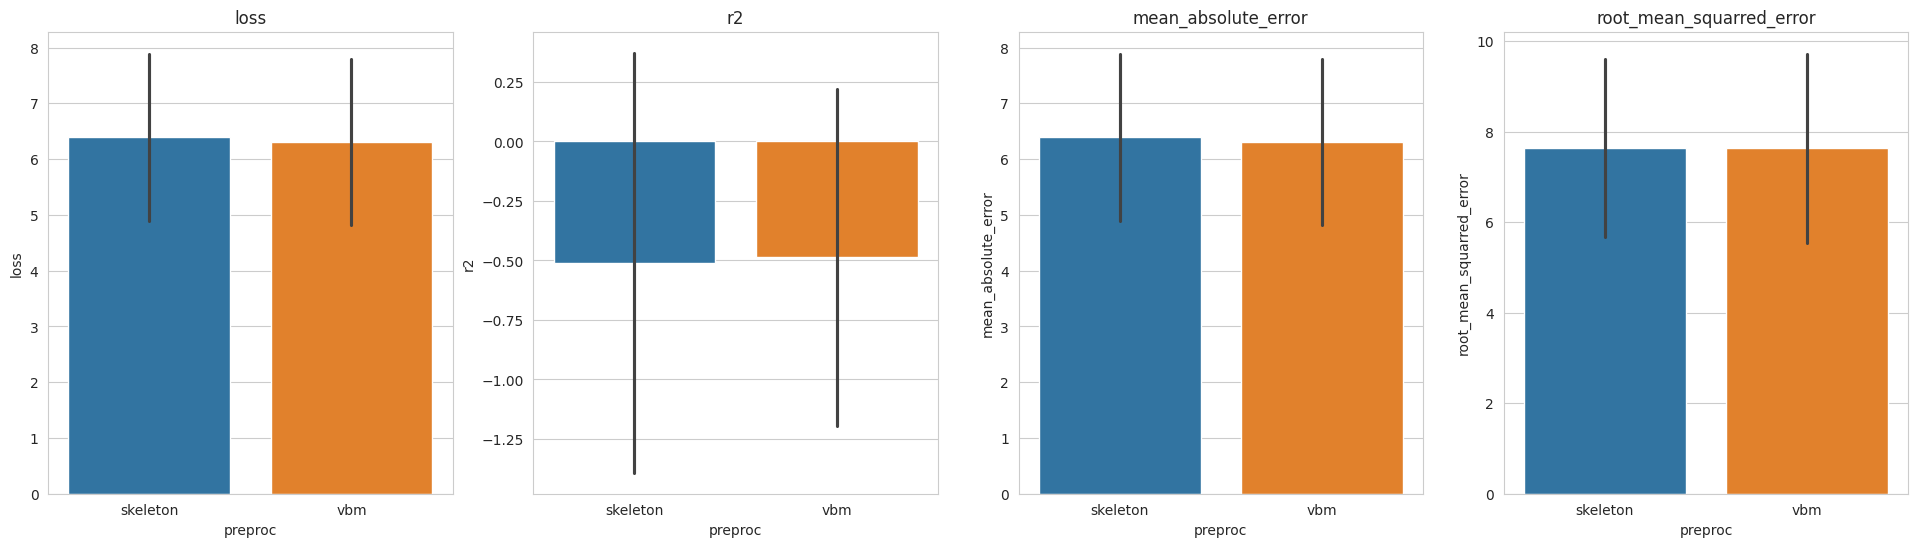

In [23]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 4, figsize=(24, 6))
    for i, cat in enumerate(["loss", "r2", "mean_absolute_error", "root_mean_squarred_error"]):
        sns.barplot(data=df_test, x="preproc", y=cat, hue="preproc", errorbar="sd", ax=ax[i])
        ax[i].set_title(cat)
plt.show()

In [ ]:
y_pred_skel = {}
y_pred_vbm = {}
y_true = {}
for fold in range(10):
    y_pred_skel[f"fold-{fold}"] = np.load(os.path.join(path2models, "skeleton", "20240920_dlmodel-skeleton", f"y_pred_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_true_skel = np.load(os.path.join(path2models, "skeleton", "20240920_dlmodel-skeleton", f"y_true_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_pred_vbm[f"fold-{fold}"] = np.load(os.path.join(path2models, "vbm", "20240920_dlmodel-vbm", f"y_pred_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_true_vbm = np.load(os.path.join(path2models, "vbm", "20240920_dlmodel-vbm", f"y_true_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")

    # sanity check
    assert np.all(y_true_vbm == y_true_skel)
    y_true[f"fold-{fold}"] = y_true_skel


In [ ]:
id_types = {"participant_id": str,
            "session": int,
            "acq": int,
            "run": int}
scheme = pd.read_csv(os.path.join(path2root, "stratified_10_fold_ausz.csv"), sep=",", dtype=id_types)
metadata = pd.read_csv(os.path.join(path2root, "ausz_t1mri_participants.csv"), sep=",", dtype=id_types)

In [ ]:
df_pred = metadata[["participant_id", "session", "NSS", "sex", "age", "diagnosis", "tiv", "skeleton_size"]].copy(deep=True)
for fold in range(10):

    # Sanity check
    nss = metadata.loc[scheme[f"fold{fold}"]=="test", "NSS"].values
    assert np.all(y_true[f"fold-{fold}"] == nss)

    df_pred.loc[scheme[f"fold{fold}"]=="test", "y_pred_skel"] = y_pred_skel[f"fold-{fold}"]
    df_pred.loc[scheme[f"fold{fold}"]=="test", "y_pred_vbm"] = y_pred_vbm[f"fold-{fold}"]

In [ ]:
df_pred.head()

,participant_id,session,NSS,sex,age,diagnosis,tiv,skeleton_size,y_pred_skel,y_pred_vbm
0,LF130278,1,15.0,M,19.0,asd,1528.065680,34236,8.643682,12.549897
1,LA130256,1,5.5,M,22.0,control,1469.609340,38026,13.564445,11.094248
2,DC140291,1,9.5,M,20.0,scz,1973.513299,39690,7.669085,8.035730
3,CS130274,1,16.0,F,24.0,scz,1713.915132,35365,12.155376,9.108535
4,YR150471,1,11.5,M,19.0,control,1516.548036,35981,12.728226,6.268651


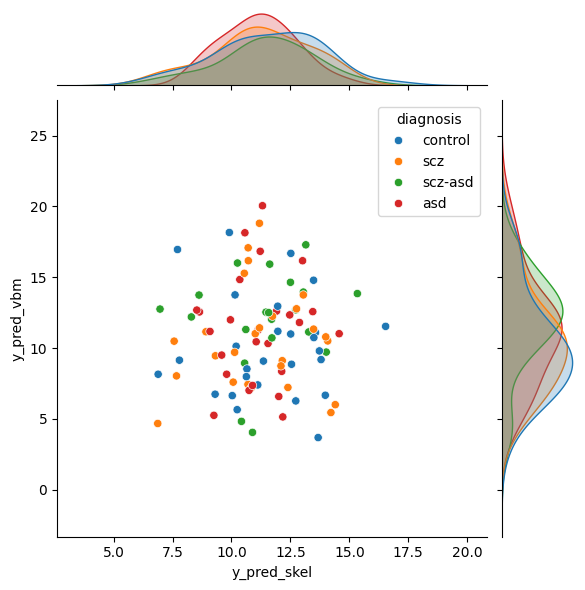

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.jointplot(data=df_pred, x="y_pred_skel", y="y_pred_vbm", hue="diagnosis", hue_order=["control", "scz", "scz-asd", "asd"])
plt.show()

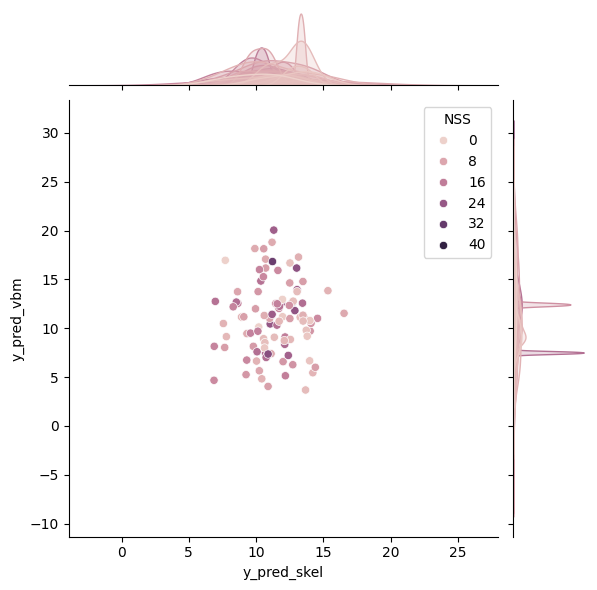

In [ ]:
sns.jointplot(data=df_pred, x="y_pred_skel", y="y_pred_vbm", hue="NSS")
plt.show()

In [ ]:
df_pred[scheme[f"fold0"] == "test"]

,participant_id,session,NSS,sex,age,diagnosis,tiv,skeleton_size,y_pred_skel,y_pred_vbm
6,HM130208,1,13.5,F,23.0,control,1509.918551,34799,9.306721,6.742994
10,SR160602,1,3.0,m,19.0,control,1391.604031,35615,12.518436,16.683533
22,RG130219,1,7.5,M,28.0,control,1542.764055,38260,11.115630,7.397028
35,BI160653,1,4.0,F,20.0,control,1427.691282,35623,11.355567,9.080843
50,GB130253,1,13.5,M,21.0,scz,1810.781163,35561,10.544961,15.277003
63,DP160513,1,13.0,M,24.0,asd,1601.781702,37959,14.568209,11.014420
71,AL120142,1,10.5,M,30.0,scz,1714.439714,38737,14.083165,10.504123
78,RE1606510,1,1.5,M,23.0,control,1785.421267,36065,11.967882,11.184374
88,FF130272,1,14.5,M,19.0,control,1340.499083,20604,6.890673,8.151997
91,RA130227,1,7.0,M,24.0,control,1478.257462,38072,9.910633,18.157703


# Concatenation of predictions

## Mean of predictions

In [26]:
y_pred_skel = {}
y_pred_vbm = {}
y_true = {}
for fold in range(10):
    y_pred_skel[f"fold-{fold}"] = np.load(os.path.join(path2models, "skeleton", "20240920_dlmodel-skeleton", f"y_pred_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_true_skel = np.load(os.path.join(path2models, "skeleton", "20240920_dlmodel-skeleton", f"y_true_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_pred_vbm[f"fold-{fold}"] = np.load(os.path.join(path2models, "vbm", "20240920_dlmodel-vbm", f"y_pred_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")
    y_true_vbm = np.load(os.path.join(path2models, "vbm", "20240920_dlmodel-vbm", f"y_true_fold-{fold}_epoch-{epoch_f}_test.npy"), mmap_mode="r")

    # sanity check
    assert np.all(y_true_vbm == y_true_skel)
    y_true[f"fold-{fold}"] = y_true_skel


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_mean = {}

scores = {"fold": [], "r2": [], "mean_absolute_error": [], "root_mean_squarred_error": [], "preproc": []}

for fold in range(10):
    y_pred_mean[f"fold-{fold}"] = (y_pred_vbm[f"fold-{fold}"] + y_pred_skel[f"fold-{fold}"]) / 2
    scores["fold"].append(fold)
    scores["preproc"].append("mean")
    scores["r2"].append(r2_score(y_pred=y_pred_mean[f"fold-{fold}"], y_true=y_true[f"fold-{fold}"]))
    scores["mean_absolute_error"].append(mean_absolute_error(y_pred=y_pred_mean[f"fold-{fold}"], y_true=y_true[f"fold-{fold}"]))
    scores["root_mean_squarred_error"].append(mean_squared_error(y_pred=y_pred_mean[f"fold-{fold}"], y_true=y_true[f"fold-{fold}"], squared=False))

scores_df = pd.concat([df_test[["fold", "r2", "mean_absolute_error", "root_mean_squarred_error", "preproc"]], pd.DataFrame(scores)], axis=0)



In [42]:
scores_df.head()

,fold,r2,mean_absolute_error,root_mean_squarred_error,preproc
0,0,-0.769647,5.377717,6.126517,skeleton
0,1,-0.306121,6.860005,7.668431,skeleton
0,2,-0.033121,9.053913,12.121583,skeleton
0,3,-0.334715,5.689374,6.989558,skeleton
0,4,-0.600952,4.588212,5.908024,skeleton


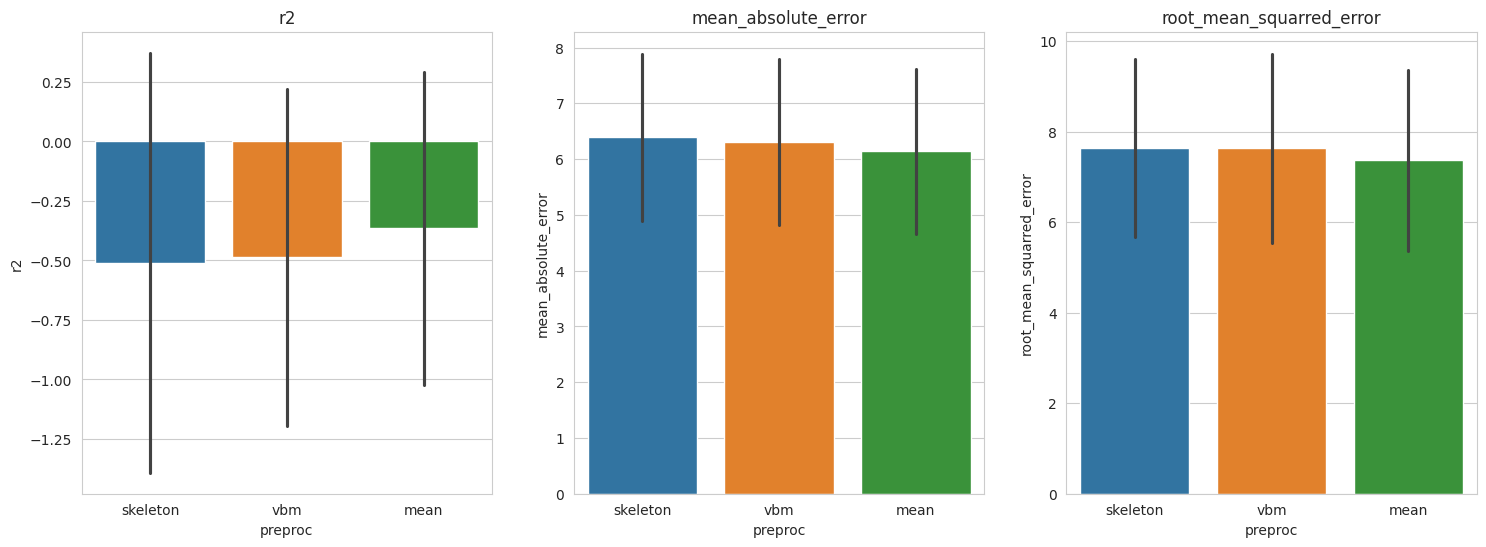

In [45]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for i, cat in enumerate(["r2", "mean_absolute_error", "root_mean_squarred_error"]):
        sns.barplot(data=scores_df, x="preproc", y=cat, hue="preproc", errorbar="sd", ax=ax[i])
        ax[i].set_title(cat)
plt.show()

## Weighted average

In [49]:
from sklearn.linear_model import Ridge
from collections import defaultdict

In [70]:
# Ridge
nb_folds = 10

logs = defaultdict(list)
for fold in range(nb_folds):
    print(f"Fold: {fold}")
    # 0) Load data
    y_pred_s = np.concatenate([y_pred_skel[f"fold-{f}"] for f in range(nb_folds) if f != fold], axis=0)
    y_pred_v = np.concatenate([y_pred_vbm[f"fold-{f}"] for f in range(nb_folds) if f != fold], axis=0)
    train_data = np.stack([y_pred_s, y_pred_v], axis=1)
    y_train = np.concatenate([y_true[f"fold-{f}"] for f in range(nb_folds) if f != fold], axis=0)
    test_data = np.stack([y_pred_skel[f"fold-{fold}"], y_pred_vbm[f"fold-{fold}"]], axis=1)
    y_test = y_true[f"fold-{fold}"]


    # 2) Training    
    model = Ridge(alpha=0.1, fit_intercept=True, solver="auto")
    model.fit(train_data, y_train)
    print(model.coef_)

    # 3) Testing
    y_pred_test = model.predict(test_data)
    r2 = model.score(test_data, y_test)
    rmse = mean_squared_error(y_pred=y_pred_test, y_true=y_test, squared=False) 
    mae = mean_absolute_error(y_pred=y_pred_test, y_true=y_test)

    # 4) Saving
    logs["fold"].append(fold)
    logs["preproc"].append("weighted_average")
    for metric, value in zip(["r2", "root_mean_squarred_error", "mean_absolute_error"], [r2, rmse, mae]):
        logs[metric].append(value)

logs_df = pd.DataFrame(logs)

Fold: 0
[-0.21613955  0.34464493]
Fold: 1
[-0.23652044  0.2839852 ]
Fold: 2
[-0.3685933   0.18508637]
Fold: 3
[-0.24147774  0.251285  ]
Fold: 4
[-0.18093975  0.35779926]
Fold: 5
[-0.51813495  0.31890368]
Fold: 6
[-0.2500992   0.17473929]
Fold: 7
[-0.23862182  0.11431756]
Fold: 8
[-0.38014463  0.31449172]
Fold: 9
[0.03074884 0.25558716]


In [71]:
df_test_all = pd.concat([scores_df, logs_df], axis=0)

In [72]:
df_test_all

,fold,r2,mean_absolute_error,root_mean_squarred_error,preproc
0,0,-0.769647,5.377717,6.126517,skeleton
0,1,-0.306121,6.860005,7.668431,skeleton
0,2,-0.033121,9.053913,12.121583,skeleton
0,3,-0.334715,5.689374,6.989558,skeleton
0,4,-0.600952,4.588212,5.908024,skeleton
0,5,0.205578,6.146623,6.819493,skeleton
0,6,-0.268380,4.393452,5.488180,skeleton
0,7,-0.085688,7.790536,9.403685,skeleton
0,8,-0.017421,6.176836,7.647975,skeleton
0,9,-2.884718,7.833432,8.268678,skeleton


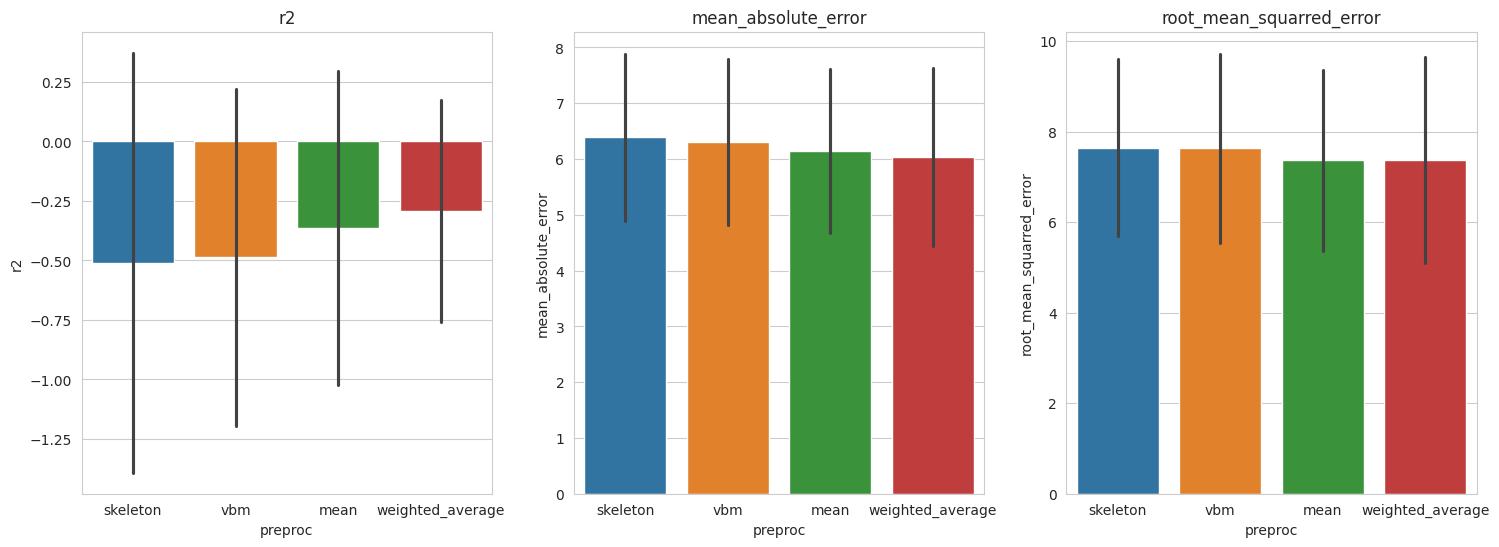

In [74]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for i, cat in enumerate(["r2", "mean_absolute_error", "root_mean_squarred_error"]):
        sns.barplot(data=df_test_all, x="preproc", y=cat, hue="preproc", errorbar="sd", ax=ax[i])
        ax[i].set_title(cat)
plt.show()

# With new stratification on NSS score, sex and age

In [12]:
epoch_f = 299
df_test_skel = pd.concat([pd.read_csv(os.path.join(path2models, "skeleton", "20241001_dlmodel-skeleton", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)
df_test_vbm = pd.concat([pd.read_csv(os.path.join(path2models, "vbm", "20241001_dlmodel-vbm", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)] , axis=0)
df_test_skel["preproc"] = "skeleton"
df_test_vbm["preproc"] = "vbm"

df_test = pd.concat([df_test_skel, df_test_vbm], axis=0)

In [13]:
df_test[["preproc", "mean_absolute_error", "root_mean_squarred_error", "r2"]].groupby("preproc").describe(percentiles=[0.5])

mean_absolute_error                                          \
                       count      mean       std       min       50%   
preproc                                                                
skeleton                10.0  5.959068  1.680043  3.878320  5.535207   
vbm                     10.0  5.867760  1.900056  3.706362  4.845082   

                   root_mean_squarred_error                                \
               max                    count      mean       std       min   
preproc                                                                     
skeleton  9.188692                     10.0  7.326603  2.546201  4.763001   
vbm       8.913193                     10.0  7.203542  2.399250  4.529561   

                                 r2                                          \
               50%        max count      mean       std       min       50%   
preproc                                                                       
skeleton  6.726874  13.026914  10.0 -0.107051  0.163434 -0.444692 -0.111827   
vbm       6.444812  12.001073  10.0 -0.096401  0.282353 -0.640827 -0.011601   

                    
               max  
preproc             
skeleton  0.139981  
vbm       0.296280

In [14]:
df_test

,fold,epoch,set,loss,r2,mean_absolute_error,root_mean_squarred_error,timestep,preproc
0,0,299,test,7.501518,-0.136554,7.501518,8.979104,1.727783e+09,skeleton
0,1,299,test,5.923912,0.047527,5.923912,7.892213,1.727793e+09,skeleton
0,2,299,test,5.779825,-0.228656,5.779825,6.290868,1.727803e+09,skeleton
0,3,299,test,5.290590,0.033041,5.290590,7.162880,1.727813e+09,skeleton
0,4,299,test,5.262874,0.139981,5.262873,5.954813,1.727823e+09,skeleton
0,5,299,test,7.717188,-0.175621,7.717188,9.041926,1.727833e+09,skeleton
0,6,299,test,3.878320,-0.131967,3.878320,4.770353,1.727842e+09,skeleton
0,7,299,test,4.734038,-0.091687,4.734038,5.383958,1.727852e+09,skeleton
0,8,299,test,9.188692,-0.444692,9.188692,13.026914,1.727954e+09,skeleton
0,9,299,test,4.313719,-0.081884,4.313719,4.763001,1.727964e+09,skeleton


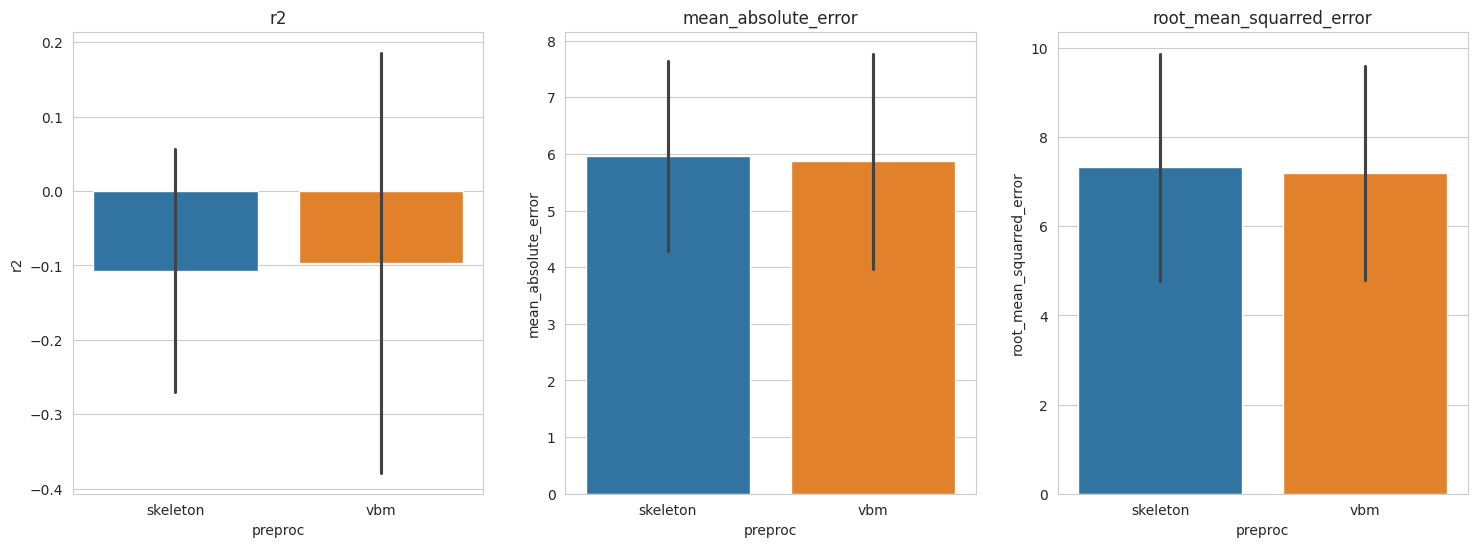

In [15]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for i, cat in enumerate(["r2", "mean_absolute_error", "root_mean_squarred_error"]):
        sns.barplot(data=df_test, x="preproc", y=cat, hue="preproc", errorbar="sd", ax=ax[i])
        ax[i].set_title(cat)
plt.show()

# Only NSS score for stratification

In [8]:
epoch_f = 99
df_test_skel = pd.concat([pd.read_csv(os.path.join(path2models, "skeleton", "20241007_dlmodel-skeleton", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)
df_test_vbm = pd.concat([pd.read_csv(os.path.join(path2models, "vbm", "20241007_dlmodel-vbm", f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)] , axis=0)
df_test_skel["preproc"] = "skeleton"
df_test_vbm["preproc"] = "vbm"

df_test = pd.concat([df_test_skel, df_test_vbm], axis=0)

In [9]:
df_test[["preproc", "mean_absolute_error", "root_mean_squarred_error", "r2"]].groupby("preproc").describe(percentiles=[0.5])

mean_absolute_error                                                   \
                       count      mean       std      min       50%       max   
preproc                                                                         
skeleton                10.0  6.051216  1.230705  4.40832  5.757372  8.363758   
vbm                     10.0  6.073671  1.027836  4.21603  5.944882  7.591715   

         root_mean_squarred_error                                          \
                            count      mean       std       min       50%   
preproc                                                                     
skeleton                     10.0  7.444289  1.870988  5.269094  7.046147   
vbm                          10.0  7.478363  1.696543  5.699171  7.016036   

                       r2                                                    
                max count      mean       std       min       50%       max  
preproc                                                                      
skeleton  11.704317  10.0 -0.014250  0.151172 -0.182934 -0.075900  0.262839  
vbm       11.173664  10.0 -0.057013  0.302933 -0.691184  0.016528  0.354413

In [10]:
df_test

,fold,epoch,set,loss,r2,mean_absolute_error,root_mean_squarred_error,timestep,preproc
0,0,99,test,5.637395,-0.041629,5.637395,6.711189,1.728296e+09,skeleton
0,1,99,test,4.408320,0.252115,4.408320,5.269094,1.728299e+09,skeleton
0,2,99,test,5.632551,-0.072510,5.632551,6.469315,1.728303e+09,skeleton
0,3,99,test,5.650547,0.007703,5.650546,6.679348,1.728306e+09,skeleton
0,4,99,test,6.501853,-0.079289,6.501853,7.549831,1.728309e+09,skeleton
0,5,99,test,4.563838,0.262839,4.563837,5.653480,1.728313e+09,skeleton
0,6,99,test,5.864199,-0.110698,5.864198,7.788666,1.728316e+09,skeleton
0,7,99,test,8.363758,-0.080508,8.363758,11.704317,1.728319e+09,skeleton
0,8,99,test,7.662549,-0.097588,7.662548,9.236546,1.728323e+09,skeleton
0,9,99,test,6.227157,-0.182934,6.227157,7.381105,1.728326e+09,skeleton


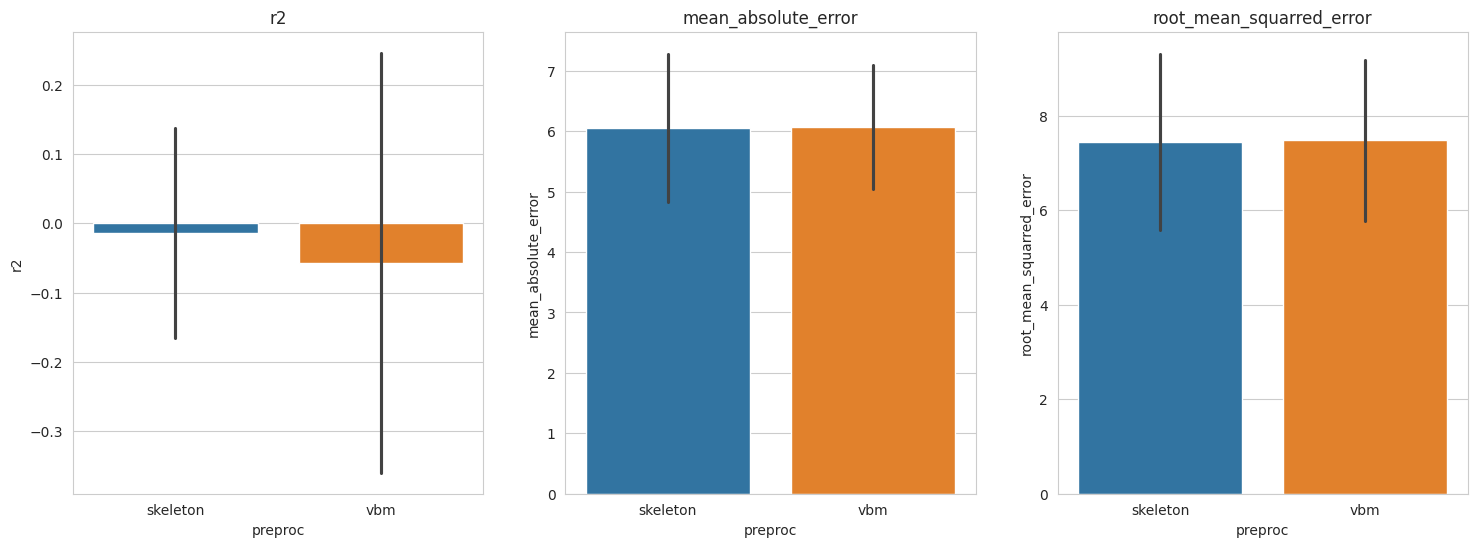

In [11]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for i, cat in enumerate(["r2", "mean_absolute_error", "root_mean_squarred_error"]):
        sns.barplot(data=df_test, x="preproc", y=cat, hue="preproc", errorbar="sd", ax=ax[i])
        ax[i].set_title(cat)
plt.show()

### Classification NSS thresholded

In [5]:
path_to_exp = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models/skeleton/20250210_dl_skeleton_nss_threshold"
epoch_f = 49
df_train = pd.concat([pd.read_csv(os.path.join(path_to_exp, f"dlmodel_fold-{fold}_epoch-{epoch_f}_train.csv")) for fold in range(10)], axis=0)
df_test = pd.concat([pd.read_csv(os.path.join(path_to_exp, f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)

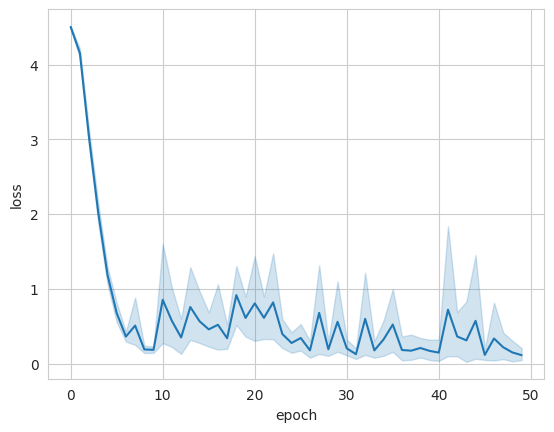

In [8]:
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_train, x="epoch", y="loss")
plt.show()

In [9]:
df_test

,fold,epoch,set,loss,roc_auc,balanced_accuracy,timestep
0,0,49,test,2.574018,0.600000,0.600000,1.739205e+09
0,1,49,test,4.410855,0.280000,0.300000,1.739207e+09
0,2,49,test,3.179512,0.375000,0.458333,1.739209e+09
0,3,49,test,2.594645,0.583333,0.541667,1.739210e+09
0,4,49,test,1.088687,0.760000,0.700000,1.739212e+09
0,5,49,test,1.882632,0.550000,0.650000,1.739214e+09
0,6,49,test,1.734568,0.600000,0.650000,1.739215e+09
0,7,49,test,5.719471,0.300000,0.325000,1.739217e+09
0,8,49,test,3.857040,0.350000,0.425000,1.739218e+09
0,9,49,test,1.088039,0.666667,0.500000,1.739220e+09


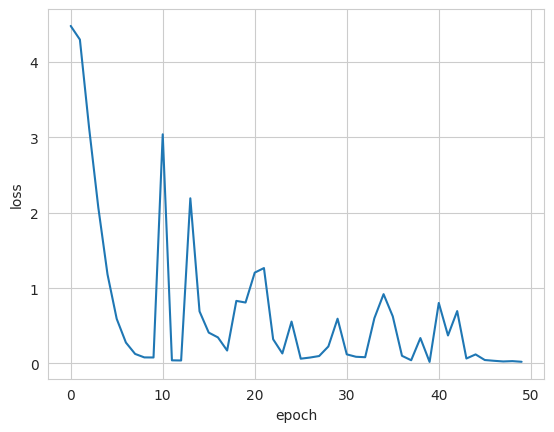

In [13]:
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_train[df_train["fold"]==1], x="epoch", y="loss")
plt.show()

In [14]:
df_test.describe()

,fold,epoch,loss,roc_auc,balanced_accuracy,timestep
count,10.00000,10.0,10.000000,10.000000,10.000000,1.000000e+01
mean,4.50000,49.0,2.812947,0.506500,0.515000,1.739213e+09
std,3.02765,0.0,1.502117,0.166975,0.138433,4.937827e+03
min,0.00000,49.0,1.088039,0.280000,0.300000,1.739205e+09
25%,2.25000,49.0,1.771584,0.356250,0.433333,1.739209e+09
50%,4.50000,49.0,2.584332,0.566667,0.520833,1.739213e+09
75%,6.75000,49.0,3.687658,0.600000,0.637500,1.739216e+09
max,9.00000,49.0,5.719471,0.760000,0.700000,1.739220e+09
